In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

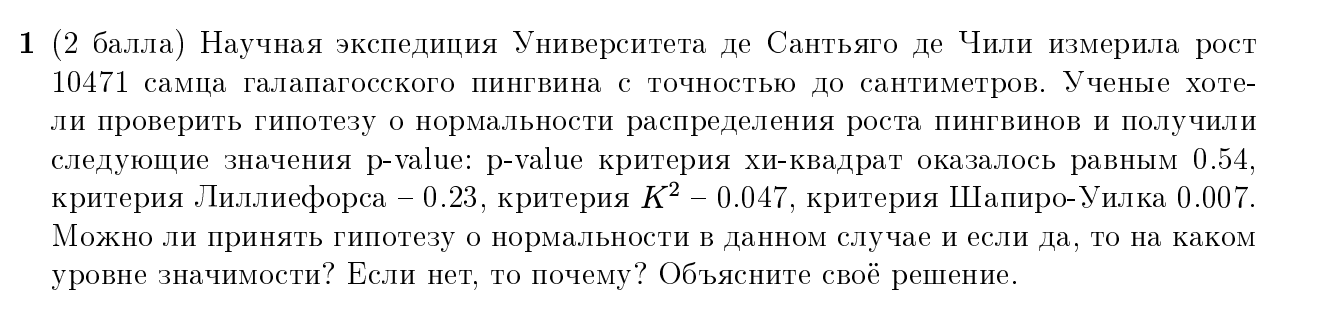

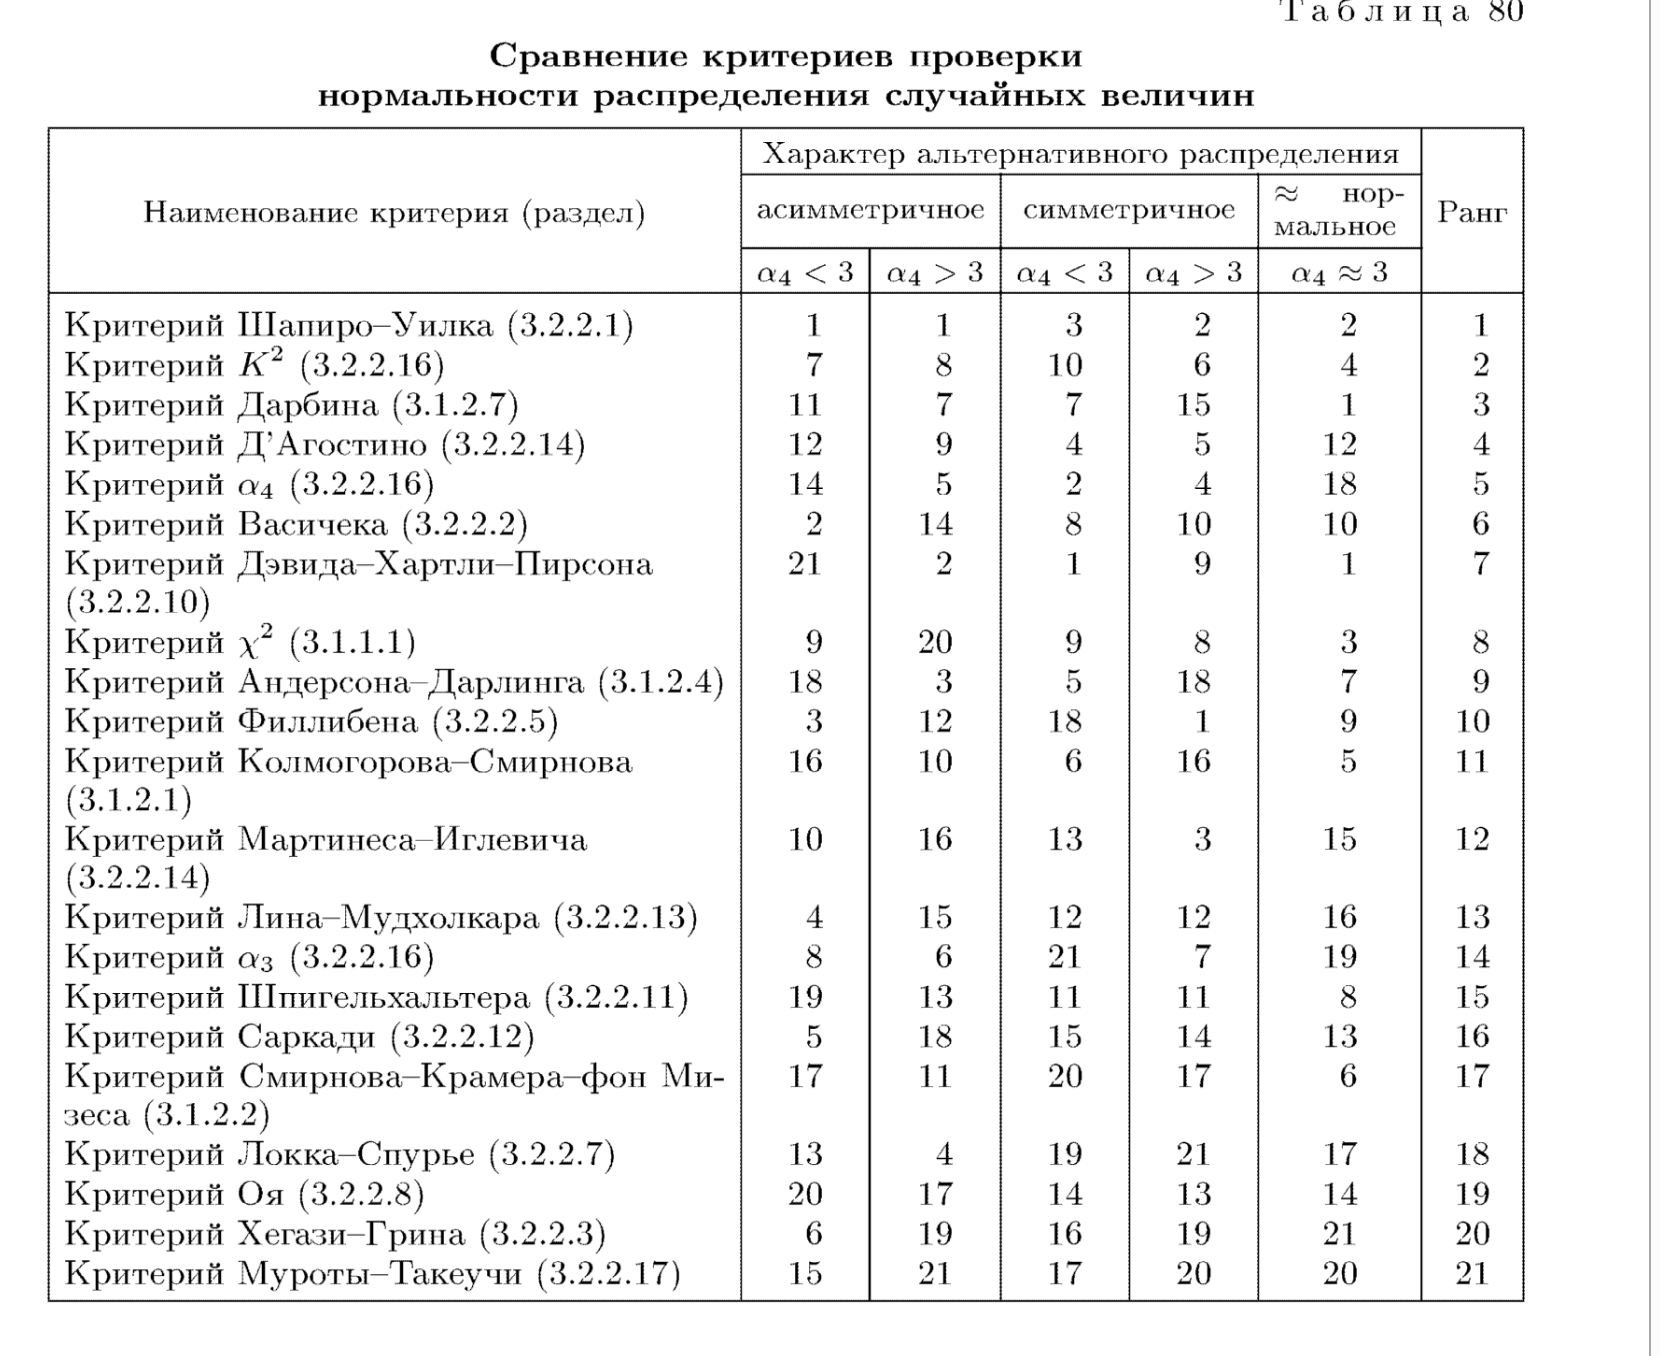

Сказали считать, что множественную проверку гипотез мы пока не знаем. Почитаем тогда про свойства критериев и то как они чебя ведут на различных данных

1) Критерий Шапиро-Уилка

Критерий Шапиро-Уилка основан на оптимальной линейной несмещённой оценке дисперсии к её обычной оценке методом максимального правдоподобия. Считается что это один из наиболее мощных критериев проверки нормальности. Во-первых он хорош потому что применим для моделей с произвольным средним и отклонением. Во-вторых мы же не знаем альтернативу. И у нас не сущ-ет РНМК. ТО есть мы не можем вот сказать что "этот критерий самый лучший". Но плюс критерия Шапиро-Уилка в том, что у него хорошая мощность для широкого спектра альтернатив. Как я прочитала [вот тут](https://translated.turbopages.org/proxy_u/en-ru.ru.95290aed-6404c16a-7f65f1df-74722d776562/https/stats.stackexchange.com/questions/90697/is-shapiro-wilk-the-best-normality-test-why-might-it-be-better-than-other-tests) - критерий Шапиро-Уилка также хорош из-за того что учитывает ковариации между порядковыми статистиками. Из Кобзаря(книжка которая во всех отсылках Википедии) можно посмотреть ранг данного критерия в таблице предпочтительных для проверки гипотезы о нормальности - ранг данного критерия 1 - то есть самый предпочтительный

Но есть ~~один нюанс~~ одно но - критерий Шапиро-Уилка как бы он ни был хорош не рекомендуют применять на больших значениях n - а у нас порядка 10000 (надо же это куда то впихнуть)

2) Критерий $K^2$

Является критерием ассиметрии и эксцесса. То есть основывается на том факте, что у нормального распределения коэф ассиметрии 0 а эксцесса 3. Пишут(да и это логично в принципе), что этот критерий следует воспринимать как крритерий установления отклонения от нормальности (ведь значения 0 и 3 могут быть не только у нормального). Но из этого факта я не особо понимаю, почему этот критерий считается достаточно мощным. Скорее всего этого происходит из-за того что он очень хорошо работает на альтернативах которых несравнимо больше(ассиметричных с другим эксцессом). В таблице Кобзаря не смотря на то что по ключевым альтернативам он ни разу не вошел в топ-3 - данный критерий занимает аж второе место.

3) Критерий Лиллиефорса

Собственно это тот же Колмогоров-Смирнов только использует выборочное среднее и выборочную дисперсию. При этом p-value у этого критерия при n > 30 больше чем у Колмогорова-Смирнова, что значит что ранг этого критерия скорее чутка повыше.

4) Критерий хи-вадрат

~~Баян~~ База. Но не считается супер мощным в непрерывном случае. К тому же уж очень много всего зависит от бинов и их кол-ва и так далее

Исходя из изучения критериев, я бы наверное не стала применять гипотезу о нормальности выборки.

Во-первых - значения хи-вадрат и лиллиефорса все таки большие, а значение $K^2$ уж очень близкр к каноничным 0.05 . Шапиро-Уилк конечно дает прекрасный результат, но опять же меня пугает размер выборки и тот факт что между 1-ым и 2-ым критерием в таблице рангов такое большое различие в значениях p-value. 


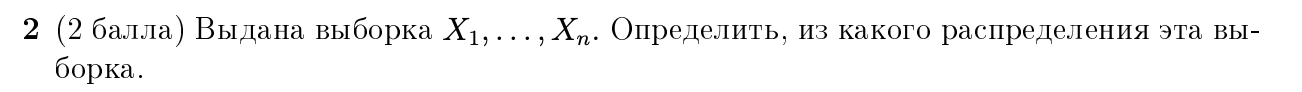

Сказали выбрать одни данные из нескольких и ~~молиться~~ на то что мы сможем там подобрать параметры распредедения. Я решила взять датасет wine потому что это баян дс-потока а раз баян то значит там будет что-то хорошее.



In [3]:
# ds
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline'
          ]
data = pd.read_csv(url, header=None, names=columns)
data.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Наши данные - четвертый столбец

In [6]:
samples = data['Alcalinity of ash'].to_numpy()
len(samples)

178

Начнем с того что построим QQ-plot и гистограмму распределения и выведем гипотезу о нормальности

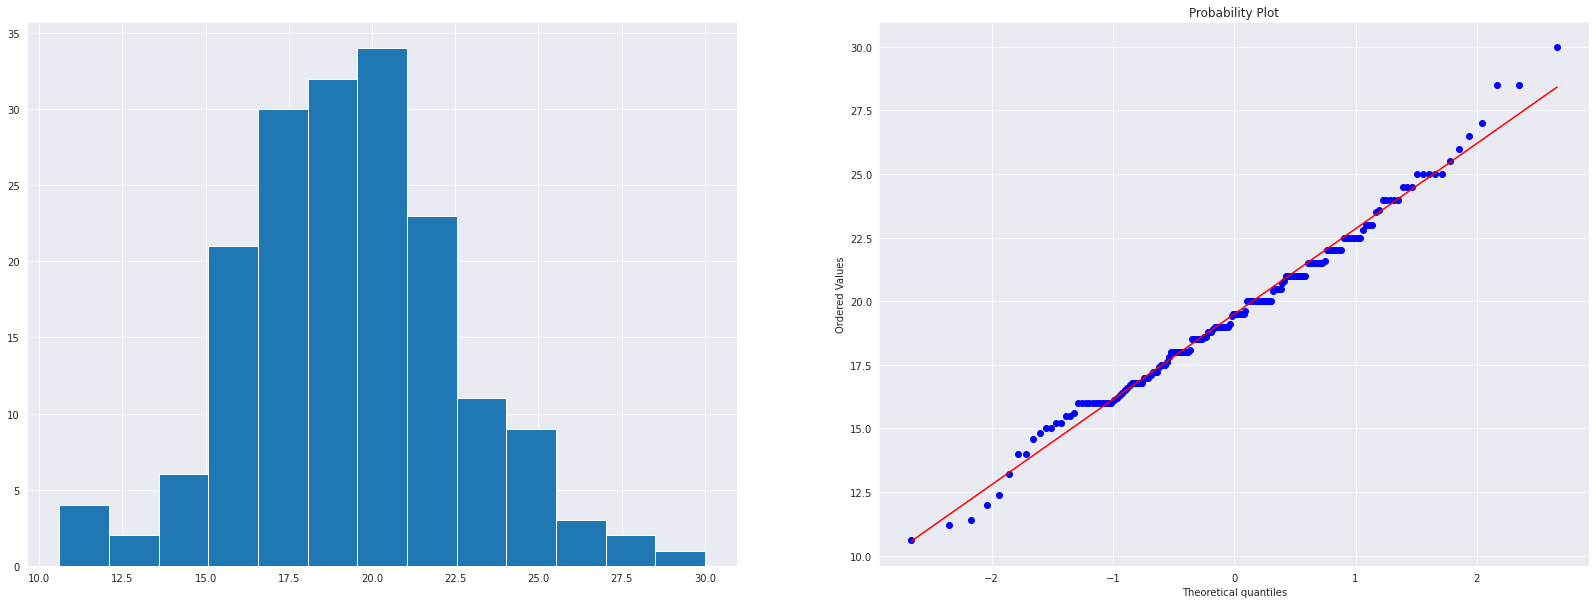

In [62]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(28, 10))
  plt.subplot(1, 2, 1)
  plt.hist(samples, bins=13)

  plt.subplot(1, 2, 2)
  sps.probplot(x=samples, plot=plt)

Ну вообще похоже на нормальное поэтому давайте применим несколько критериев - 
Шапиро-Уилка и Лиллиефорса и тест типа Харке Бера

$H_0$ - выборка из нормального распределения

In [18]:
from statsmodels.stats.diagnostic import lilliefors


alpha = 0.05

shapiro_stat, shapiro_p = sps.shapiro(samples)
lil_stat, lil_pip = lilliefors(samples)
jb_stat, jb_p = sps.normaltest(samples)


data = {'Stat': [shapiro_stat, lil_stat, jb_stat], 'p-value': [shapiro_p, lil_pip, jb_p], 'reject?': [shapiro_p < alpha, lil_pip < alpha, jb_p < alpha]}
df = pd.DataFrame(data=data, index=['Шапиро-Уилк', 'Лиллиефорс', 'Типа Харке-Бера'])
df

,Stat,p-value,reject?
Шапиро-Уилк,0.990226,0.263949,False
Лиллиефорс,0.063491,0.098863,False
Типа Харке-Бера,3.120889,0.210043,False


Ого, круто! Все критерии не отвергают нулевую гипотезу - значит будем считать что она пришла к нам из $N(μ, σ^2)$ - теперь определим параметры

In [19]:
sps.norm.fit(samples)

(19.49494382022472, 3.3301697576582128)

Теперь так как мы знаем параметры распределения то можем воспользоваться тестом колмогорова смирнова

In [20]:
sps.kstest(samples, sps.norm(19.49494382022472, 3.3301697576582128).cdf)

KstestResult(statistic=0.06332274740488919, pvalue=0.45468651761445567, statistic_location=20.0, statistic_sign=1)

Значение p-value большое то есть гипотеза не отвергается!

На всякий случай - нанесем на гистограмму функцию плотности нормального с подобранными параметрами

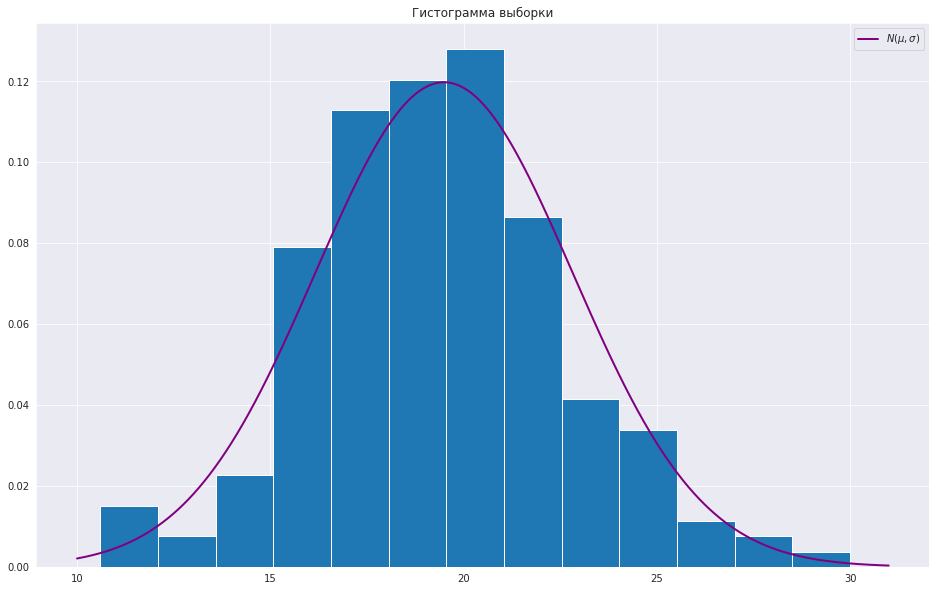

In [61]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=13, density=True)

  grid = np.linspace(10, 31, 10000)
  plt.plot(grid, sps.norm(19.49494382022472, 3.3301697576582128).pdf(grid), c='purple', lw=2, label='$N(\mu, \sigma)$')
  plt.legend()

Получаем что выборка неплохо ложится под искомую плотность, неидельно, но неплохо

**Ответ** $N(19.49494382022472, 3.3301697576582128)$

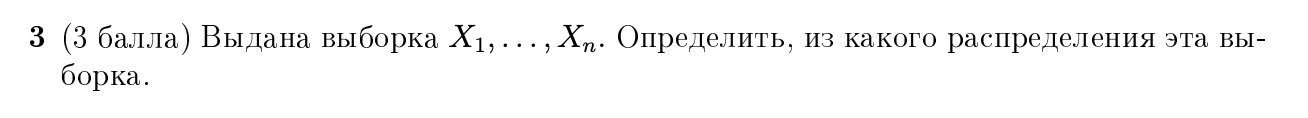

Возьмем столбец speed из этого файла и начнем как в прошлой задаче

In [2]:
data = pd.read_csv('go_track_tracks.csv')
data.head(10)

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN
5,10,2,1.346913,0.006682,0.009,2,0,0,1,NaN
6,11,3,36.850787,0.228001,8.402,3,0,0,1,NaN
7,12,1,17.405131,0.038782,0.675,3,0,0,2,NaN
8,13,1,15.395436,0.526844,8.111,3,0,0,2,NaN
9,14,1,8.902729,0.003033,0.027,2,0,0,2,NaN


In [3]:
samples = data['speed'].to_numpy()
len(samples)

163

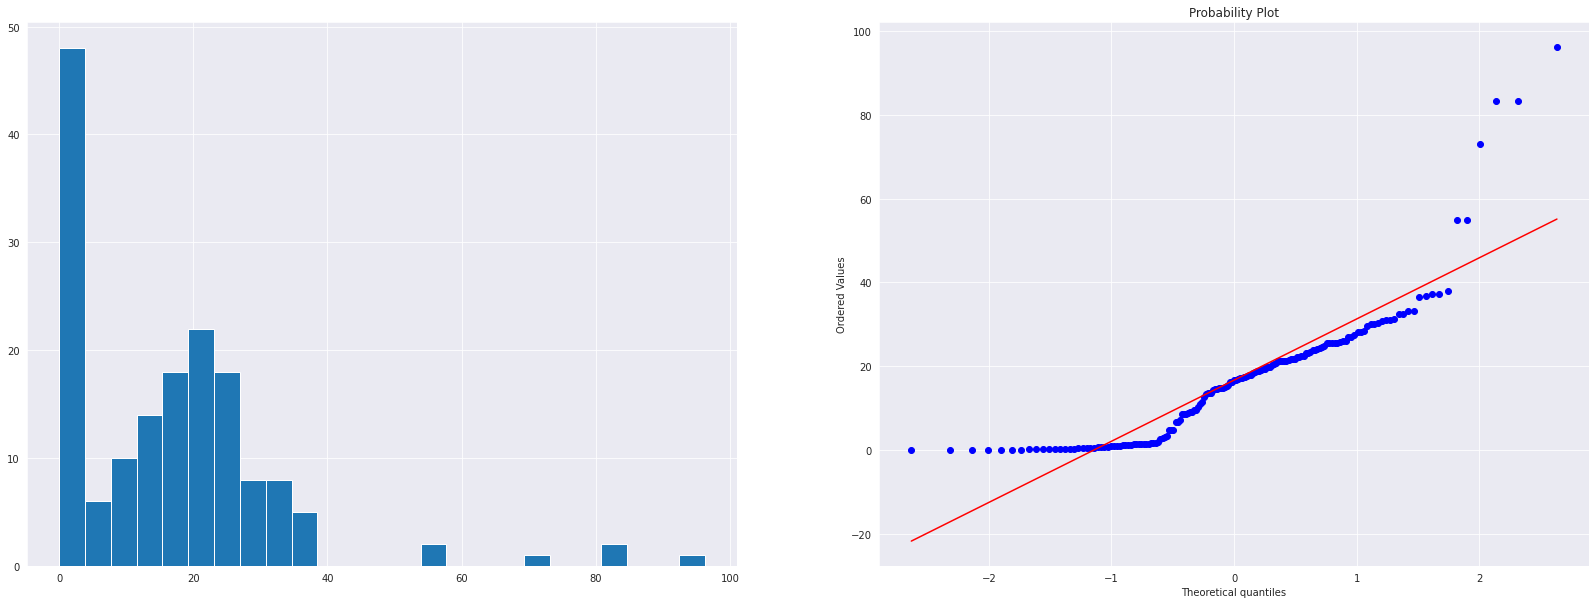

In [4]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(28, 10))
  plt.subplot(1, 2, 1)
  plt.hist(samples, bins=25)

  plt.subplot(1, 2, 2)
  sps.probplot(x=samples, plot=plt)

Вообще похоже на что-то правостороннее - например на экпоненциальное или гамма распределение.

Попробуем проверить нулевую гипотезу что выборка пришла из экспоненциального

In [5]:
sps.anderson(samples, 'expon')

AndersonResult(statistic=9.586798660864815, critical_values=array([0.919, 1.074, 1.336, 1.6  , 1.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=16.70473796691282)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Проверим теперь тестом колмогорова-смирнова

In [6]:
sps.kstest(samples, sps.expon(scale=16.70473796691282).cdf)

KstestResult(statistic=0.16625795961940754, pvalue=0.0002089364785342862, statistic_location=1.60135225301366, statistic_sign=1)

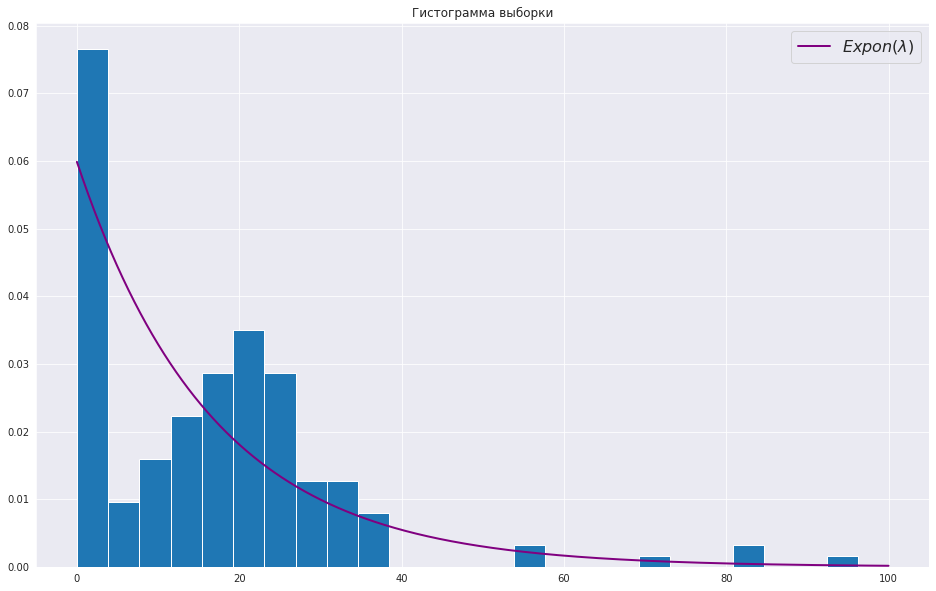

In [7]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=25, density=True)

  grid = np.linspace(0, 100, 10000)
  plt.plot(grid, sps.expon(scale=16.70473796691282).pdf(grid), c='purple', lw=2, label='$Expon(\lambda)$')
  plt.legend(fontsize=16)

Ага, ничего не получилось - андерсон смог подбить наше распределение по экспоненциальное с параметром 16.70473796691282 но тест колмогорова смирнова да и гистограмма говорят об обратном

Хотела попробовать еще еще гаммма-распределение - но такого нет(отложим на будущее)

Но зато есть какое-то неведомое мне раньше распределение Гумбеля (рассмотрим только правостороннее ибо ну ясно же из гистограммы что у нас не левостороннее)

In [8]:
sps.anderson(samples, 'gumbel_r')

AndersonResult(statistic=4.14341405586714, critical_values=array([0.467, 0.627, 0.745, 0.863, 1.022]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.994036311762224, scale=11.047197383089843)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [9]:
sps.kstest(samples, sps.gumbel_r(loc=9.994036311762224, scale=11.047197383089843).cdf)

KstestResult(statistic=0.14663211892627853, pvalue=0.0015984394953499073, statistic_location=1.83416125334352, statistic_sign=1)

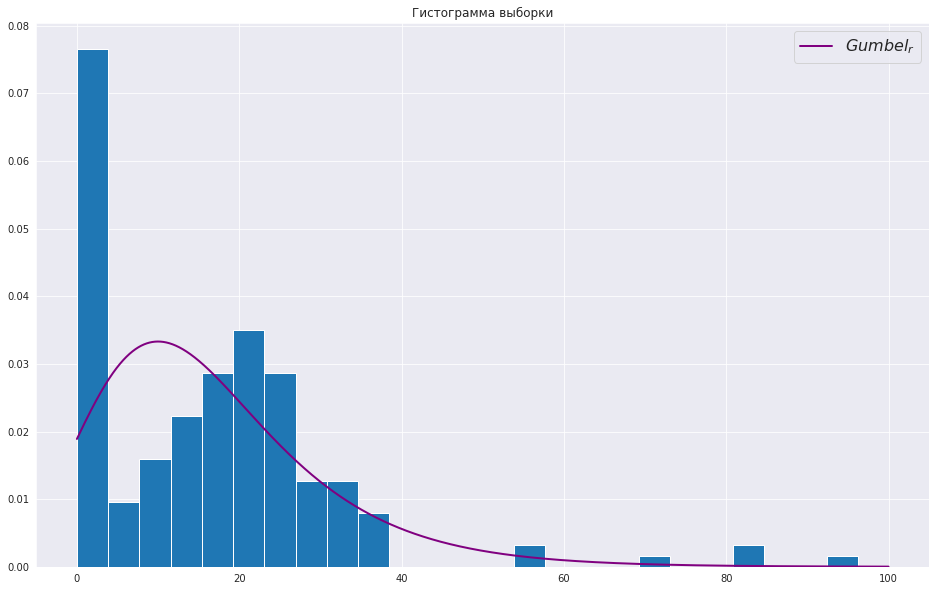

In [10]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=25, density=True)

  grid = np.linspace(0, 100, 10000)
  plt.plot(grid, sps.gumbel_r(loc=9.994036311762224, scale=11.047197383089843).pdf(grid), c='purple', lw=2, label='$Gumbel_r$')
  plt.legend(fontsize=16)

Тоже плохо

Попробуем критерием хи-вадрат рассмотреть гамма распределение, бета распределение и логнормальное распределение(больше не могу придумать скошенных вправо)

Для хи-квадрата надо найти ОМП - поэтому ручками разобьем на бины, посчитаем $\mu_i$ и $p_i$ и найдем статистику)))

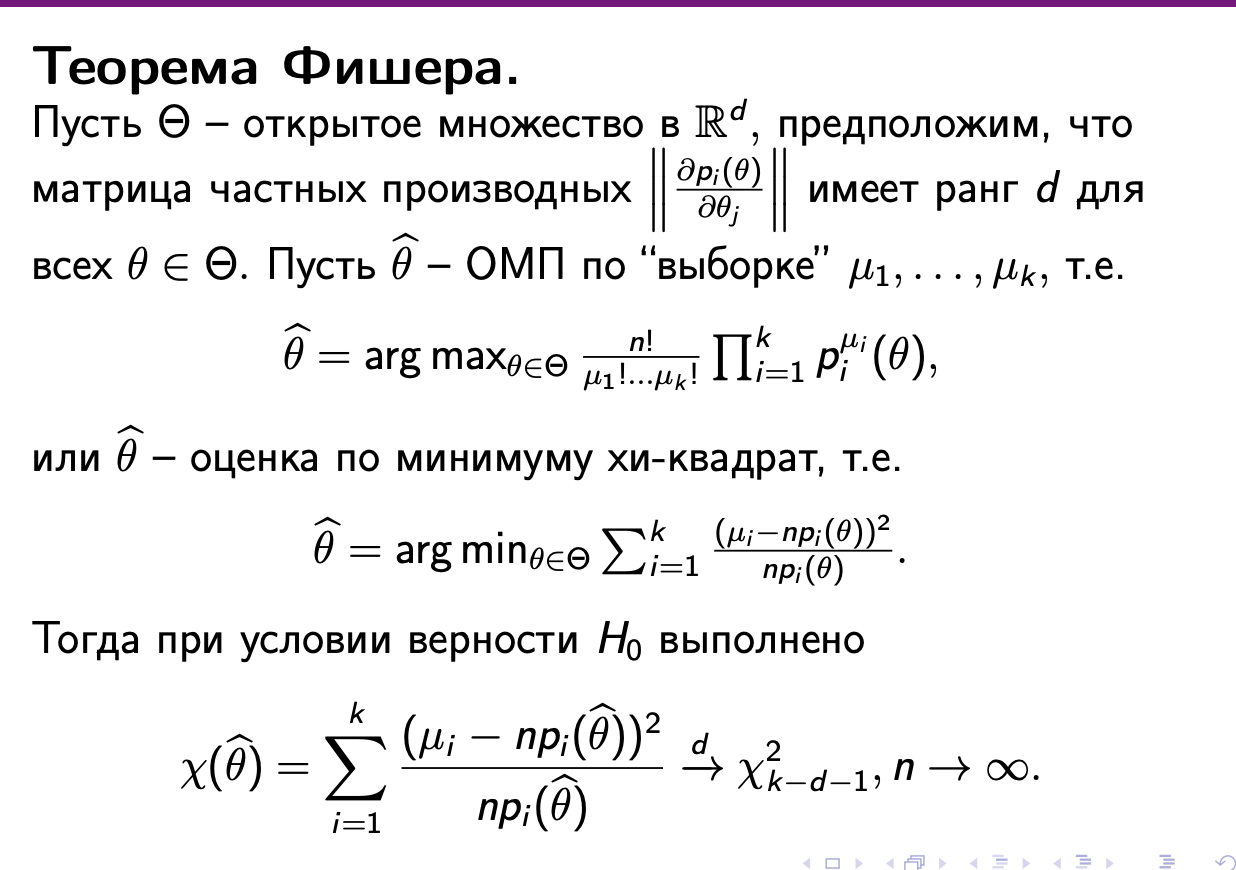

In [24]:
from scipy.optimize import minimize


def my_chisquare_gamma(sample, k=10):
  bins_step = 1. / k
  bins = np.arange(0., 1.1, bins_step)
  assert len(bins) == (k + 1)

  mu = np.zeros(len(bins) - 1)

  for i in range(len(bins) - 1):
    mu[i] = len(samples[np.where(samples < bins[i+1])]) - len(samples[np.where(samples < bins[i])])

  def prob_func(theta):
    probs = np.zeros(k)
    for i in range(k):
      probs[i] = (sps.gamma(a=theta[0], scale=theta[1]).cdf(bins[i+1]) - sps.gamma(a=theta[0], scale=theta[1]).cdf(bins[i]))
    
    probs = np.where(probs == 0, 1, probs)
    return -np.sum(mu * np.log(probs))

  theta_hat = minimize(prob_func, [0.01, 0.01]).x
  print("ОМП: ", theta_hat)
  
  probs_hat = np.zeros(k)
  for i in range(k):
      probs_hat[i] = (sps.gamma(a=theta_hat[0], scale=theta_hat[1]).cdf(bins[i+1]) - sps.gamma(a=theta_hat[0], scale=theta_hat[1]).cdf(bins[i]))

  n = len(sample)
  chi2_stat = np.sum((mu - n * probs_hat)**2 / (n * probs_hat))

  quant = sps.chi(k - 1 - 2).ppf(0.95)
  return chi2_stat, chi2_stat < quant

In [25]:
my_chisquare_gamma(samples)

ОМП:  [1.31546198 0.27662591]


(107.2231909469836, False)

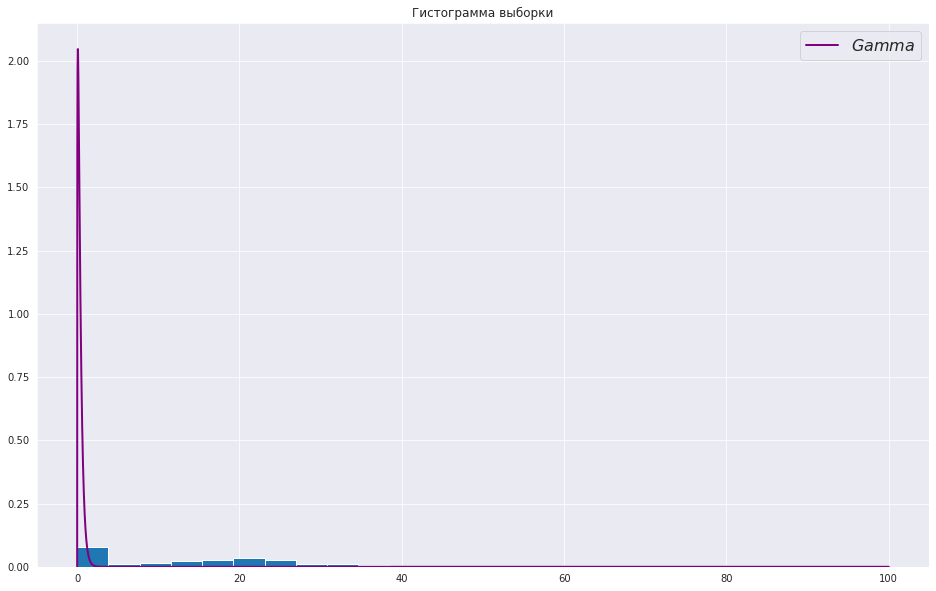

In [26]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=25, density=True)

  grid = np.linspace(0, 100, 10000)
  plt.plot(grid, sps.gamma(a=1.31546198, scale=0.27662591).pdf(grid), c='purple', lw=2, label='$Gamma$')
  plt.legend(fontsize=16)

In [27]:
sps.kstest(samples, sps.gamma(a=1.31546198, scale=0.27662591).cdf)

KstestResult(statistic=0.7959720826677608, pvalue=2.857810813753108e-111, statistic_location=1.2619744642138, statistic_sign=-1)

Отвергаем(

Если честно - мне не нравится - считаю что виноват плохой поиск у ОМП с двумя параметрами


Давайте попробуем распределение с одним параметром - например логнормальное

In [28]:
def my_chisquare_lognorm(sample, k=10):
  bins_step = 1. / k
  bins = np.arange(0., 1.1, bins_step)
  assert len(bins) == (k + 1)

  mu = np.zeros(len(bins) - 1)

  for i in range(len(bins) - 1):
    mu[i] = len(samples[np.where(samples < bins[i+1])]) - len(samples[np.where(samples < bins[i])])

  def prob_func(theta):
    probs = np.zeros(k)
    for i in range(k):
      probs[i] = (sps.lognorm(s=theta).cdf(bins[i+1]) - sps.lognorm(s=theta).cdf(bins[i]))
    
    probs = np.where(probs == 0, 1, probs)
    return -np.sum(mu * np.log(probs))

  theta_hat = minimize(prob_func, 3).x
  print("ОМП: ", theta_hat)
  
  probs_hat = np.zeros(k)
  for i in range(k):
      probs_hat[i] = (sps.lognorm(s=theta_hat).cdf(bins[i+1]) - sps.lognorm(s=theta_hat).cdf(bins[i]))

  n = len(sample)
  chi2_stat = np.sum((mu - n * probs_hat)**2 / (n * probs_hat))

  quant = sps.chi(k - 1 - 1).ppf(0.95)
  return chi2_stat, chi2_stat < quant

In [29]:
my_chisquare_lognorm(samples)

ОМП:  [1.80139844]


(38.2957153485943, False)

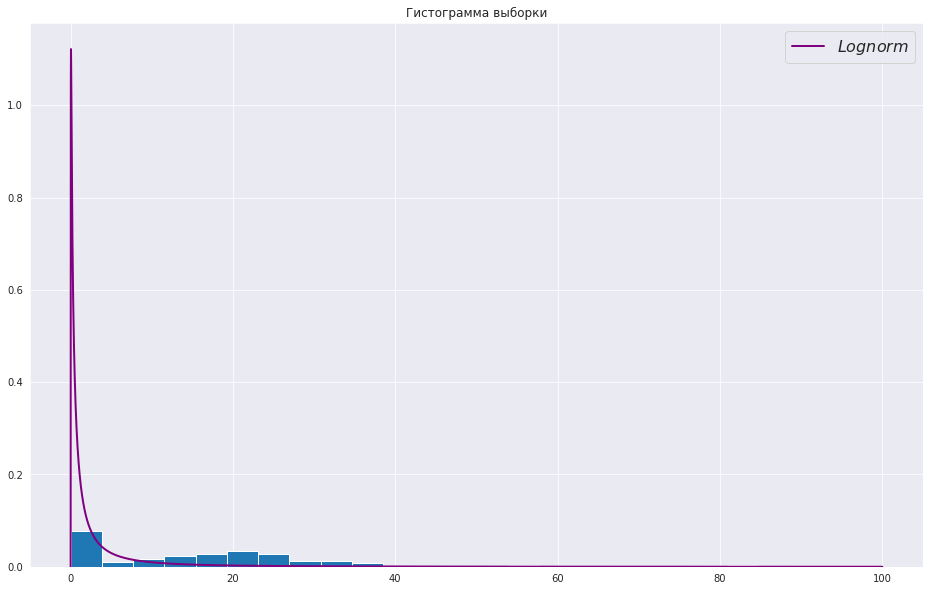

In [30]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=25, density=True)

  grid = np.linspace(0, 100, 10000)
  plt.plot(grid, sps.lognorm(s=1.80139844).pdf(grid), c='purple', lw=2, label='$Lognorm$')
  plt.legend(fontsize=16)

In [31]:
sps.kstest(samples, sps.lognorm(s=1.80139844).cdf)

KstestResult(statistic=0.5536474032101871, pvalue=1.6632877873907114e-47, statistic_location=8.68613764219664, statistic_sign=-1)

Снова ничего(

Последняя моя попытка - распределение вейбулла

In [32]:
def my_chisquare_weibull(sample, k=10):
  bins_step = 1. / k
  bins = np.arange(0., 1.1, bins_step)
  assert len(bins) == (k + 1)

  mu = np.zeros(len(bins) - 1)

  for i in range(len(bins) - 1):
    mu[i] = len(samples[np.where(samples < bins[i+1])]) - len(samples[np.where(samples < bins[i])])

  def prob_func(theta):
    probs = np.zeros(k)
    for i in range(k):
      probs[i] = (sps.weibull_min(c=theta).cdf(bins[i+1]) - sps.weibull_min(c=theta).cdf(bins[i]))
    
    probs = np.where(probs == 0, 1, probs)
    return -np.sum(mu * np.log(probs))

  theta_hat = minimize(prob_func, 0.5).x
  print("ОМП: ", theta_hat)
  
  probs_hat = np.zeros(k)
  for i in range(k):
      probs_hat[i] = (sps.weibull_min(c=theta_hat).cdf(bins[i+1]) - sps.weibull_min(c=theta_hat).cdf(bins[i]))

  n = len(sample)
  chi2_stat = np.sum((mu - n * probs_hat)**2 / (n * probs_hat))

  quant = sps.chi(k - 1 - 1).ppf(0.95)
  return chi2_stat, chi2_stat < quant

In [33]:
my_chisquare_weibull(samples)

ОМП:  [0.83443579]


(57.78524217514811, False)

In [34]:
sps.kstest(samples, sps.weibull_min(c=0.83443579).cdf)

KstestResult(statistic=0.6798634552742555, pvalue=3.185356500218342e-75, statistic_location=6.75973582327488, statistic_sign=-1)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:2267: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


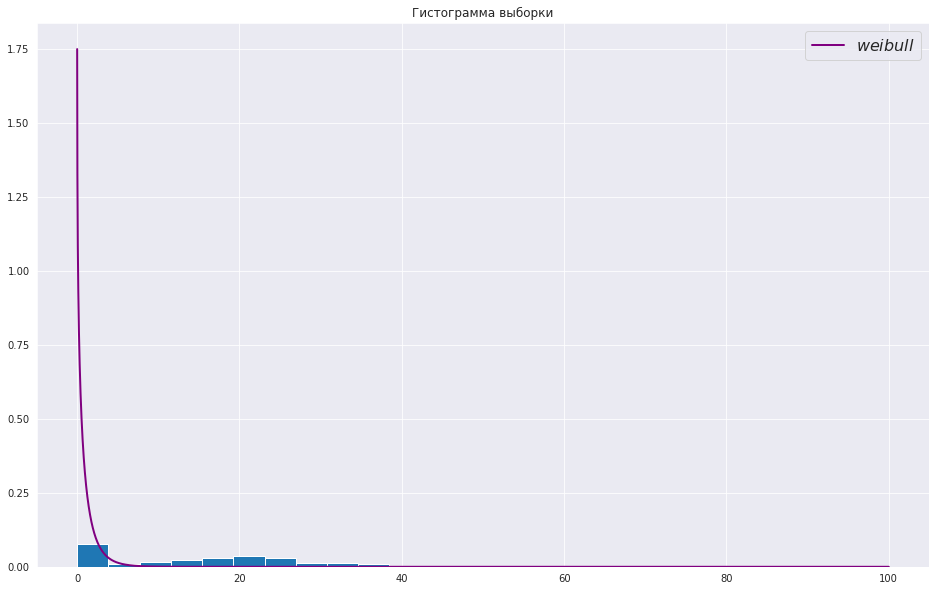

In [35]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Гистограмма выборки')
  plt.hist(samples, bins=25, density=True)

  grid = np.linspace(0, 100, 10000)
  plt.plot(grid, sps.weibull_min(c=0.83443579).pdf(grid), c='purple', lw=2, label='$weibull$')
  plt.legend(fontsize=16)

Все я сдаюсь((

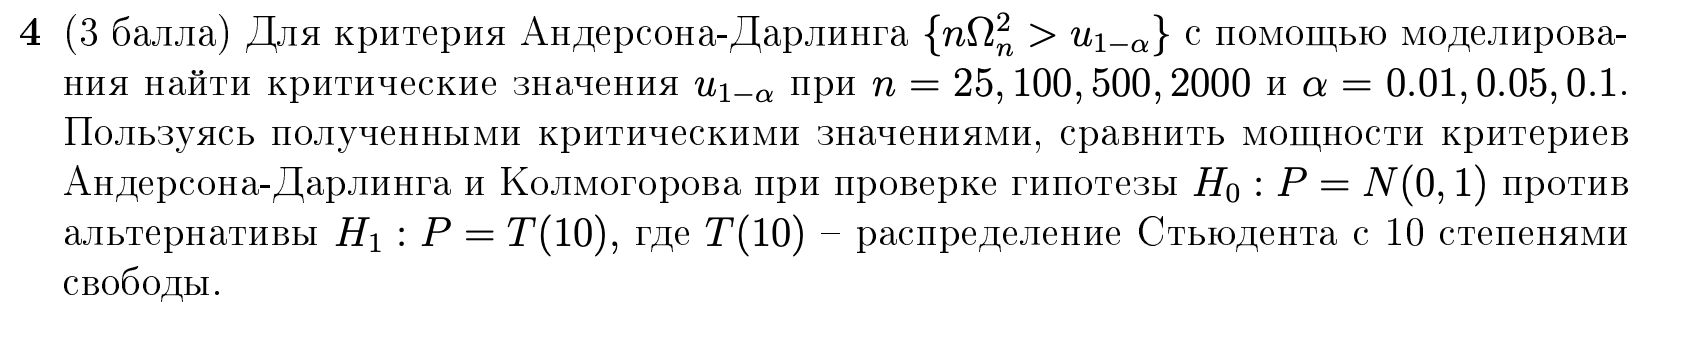

In [36]:
sizes = [25, 100, 500, 2000]
alphas = [0.01, 0.05, 0.1]

In [45]:
def anderson_crit_vals():
    for size in sizes:
      samples = sps.norm.rvs(size=(10000, size))

      stats = []
      for sample in samples:
          stats.append(sps.anderson(sample, 'norm').statistic)

      for alpha in alphas:
          quant = np.quantile(stats, 1 - alpha)
          print(f'n = {size}, alpha = {alpha}, критическое значение: {quant}')

In [42]:
anderson_crit_vals()

n = 25, alpha = 0.01, критическое значение: 1.0053498768508273
n = 25, alpha = 0.05, критическое значение: 0.7262799803380592
n = 25, alpha = 0.1, критическое значение: 0.6185941326594712
n = 100, alpha = 0.01, критическое значение: 1.0321249575236366
n = 100, alpha = 0.05, критическое значение: 0.7524564480812408
n = 100, alpha = 0.1, критическое значение: 0.6298326219154106
n = 500, alpha = 0.01, критическое значение: 1.047468430651833
n = 500, alpha = 0.05, критическое значение: 0.7541513924900698
n = 500, alpha = 0.1, критическое значение: 0.628462799821682
n = 2000, alpha = 0.01, критическое значение: 1.0034293362318956
n = 2000, alpha = 0.05, критическое значение: 0.745663394745668
n = 2000, alpha = 0.1, критическое значение: 0.6284309724228934


Видим тенденцию что при одинаковых размерах выборки с ростом альфа уменьшается квантиль ( что логично ибо мы рассматриваем $1 - \alpha$ квантили

При этом при одинаковых альфа но разных размерах выборки значения в целом. похожи с точностью до нескольких сотых

Теперь сравним мощности критериев

In [43]:
crit_vals = {
    25: {0.01 : 1.0053498768508273, 0.05: 0.7262799803380592, 0.1: 0.6185941326594712},
    100: {0.01: 1.0321249575236366, 0.05: 0.7524564480812408, 0.1: 0.6298326219154106},
    500: {0.01: 1.047468430651833, 0.05: 0.7541513924900698, 0.1: 0.628462799821682},
    2000: {0.01: 1.0034293362318956, 0.05: 0.745663394745668, 0.1: 0.6284309724228934},
  }

In [48]:
def kolm_anderson_power():
    for size in sizes:
      samples = sps.t(df=10).rvs(size=(10000, size))

      kolm, anderson = np.array([0] * 4), np.array([0] * 4)

      for sample in samples:
          and_stat = sps.anderson(sample, 'norm').statistic
          pvalue = sps.kstest(sample, sps.norm.cdf).pvalue
  
          for i, alpha in enumerate(alphas):
            anderson[i] = anderson[i] + 1 if crit_vals[size][alpha] < and_stat else anderson[i]
            kolm[i] = kolm[i] + 1 if pvalue < alpha else kolm[i]

      for i, alpha in enumerate(alphas):
          kolm_power, and_power = kolm[i] / 10000, anderson[i] / 10000
          print(f'n = {size}, alpha = {alpha}, мощность Колмогорова = {kolm_power}, мощность Андерсона-Дарлинга = {and_power}')
      print()

In [50]:
kolm_anderson_power()

n = 25, alpha = 0.01, мощность Колмогорова = 0.0105, мощность Андерсона-Дарлинга = 0.0271
n = 25, alpha = 0.05, мощность Колмогорова = 0.0549, мощность Андерсона-Дарлинга = 0.0928
n = 25, alpha = 0.1, мощность Колмогорова = 0.1063, мощность Андерсона-Дарлинга = 0.1522

n = 100, alpha = 0.01, мощность Колмогорова = 0.0125, мощность Андерсона-Дарлинга = 0.0602
n = 100, alpha = 0.05, мощность Колмогорова = 0.0587, мощность Андерсона-Дарлинга = 0.1596
n = 100, alpha = 0.1, мощность Колмогорова = 0.1142, мощность Андерсона-Дарлинга = 0.2485

n = 500, alpha = 0.01, мощность Колмогорова = 0.0118, мощность Андерсона-Дарлинга = 0.2656
n = 500, alpha = 0.05, мощность Колмогорова = 0.0692, мощность Андерсона-Дарлинга = 0.4808
n = 500, alpha = 0.1, мощность Колмогорова = 0.1413, мощность Андерсона-Дарлинга = 0.6045

n = 2000, alpha = 0.01, мощность Колмогорова = 0.0317, мощность Андерсона-Дарлинга = 0.9253
n = 2000, alpha = 0.05, мощность Колмогорова = 0.173, мощность Андерсона-Дарлинга = 0.9771
n

Видим что для всех случаев критерий Анлерсона более мощный - радует что это выполняется всегда. Скорее всего это происходит потому что критерий Андерсона более чувствителен к хваостам чем критерий Колмогорова и поэтому он более мощен на распределении стьюдента